Primero importamos la papelería que utilizaremos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

#### Este Notebook se dividirá en dos partes:
- Simulación de datos
- KNN Method

## Simulación de Datos

Para la simulación de datos, realizaré el mismo procedimiento llevado a cabo en el ejercicio de la regresión lineal.

In [2]:
def centros_asociados_a_cada_color(color, kcentros):
   
    centro = np.array([0,0])
    covarianza = np.identity(2)
    
    if color == 0: #azul
        centro = np.array([1,0])
    
    if color == 1: #rojo
        centro = np.array([0,1])

    lista_de_centros = np.random.multivariate_normal(centro,covarianza,kcentros).T
        
    return lista_de_centros

In [3]:
centros_azul = centros_asociados_a_cada_color(0,10)
centros_rojo = centros_asociados_a_cada_color(1,10)

In [4]:
def visualize_colors(ptos_azul, ptos_rojo):

    x1azul = ptos_azul[0]
    x2azul = ptos_azul[1]
    
    x1rojo = ptos_rojo[0]
    x2rojo = ptos_rojo[1]
    
    plt.plot(x1azul,x2azul,"bo")
    plt.plot(x1rojo,x2rojo,"ro")
    plt.axis([-4,4,-4,4])
    plt.title("Distribucion de puntos segun el color")
    plt.show() 

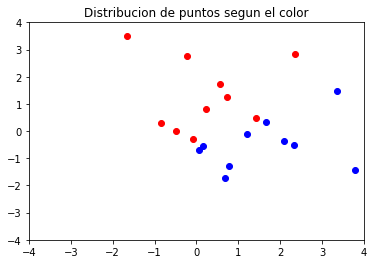

In [5]:
visualize_colors(centros_azul, centros_rojo)

In [6]:
def Simulacion_2(centros, N):
    
    Ncentros = centros.shape[1]
    
    #Initialize the list of observations 
    observations = np.zeros((2,N))
    
    #we first define the global value of the covariance
    covarianza = np.identity(2)/5
       
    #hacemos un loop entre 0 y N-1 para generar todos las observaciones requeridas
    
    for obs in range(0,N):
        #generamos un numero aleatorio entre 0 y 9 para escoger el centro de nuestra gaussiana bivariada
        indice_del_centro = random.randint(0, Ncentros-1)
        
        xcentro = centros[0,indice_del_centro]
        ycentro = centros[1,indice_del_centro]
        
        mk_centro = np.array([xcentro, ycentro])
        
        centro_aux = np.random.multivariate_normal(mk_centro,covarianza,1).T
    
        observations[0,obs] = centro_aux[0,0]
        observations[1,obs] = centro_aux[1,0]
    
    return observations

In [7]:
ptos_observados_azul =  Simulacion_2(centros_azul, 100)
ptos_observados_rojo =  Simulacion_2(centros_rojo, 100)

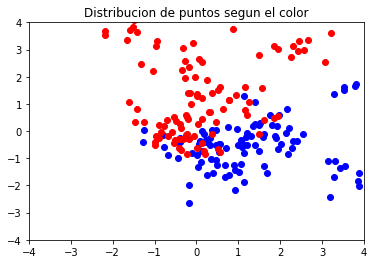

In [8]:
visualize_colors(ptos_observados_azul, ptos_observados_rojo)

## K Nearest-Neighbor Methods 

Ahora que ya están simulados los datos, es posible llevar a cabo el método de predicción de los k vecinos más cercanos

AC: Primero crearé una función que recorra la lista SET y me diga qué punto (dentro de los que estan en SET) está más cercano a un punto de prueba. Esto lo haré buscando la minima distancia (euclídea según nos indica el libro) entre el punto que está en SET y mi punto de prueba. 

In [11]:
def MinimumDistance(punto,SET):
    distancia_min=1000
    for i in range(len(SET)):
        d=np.sqrt((SET[i][1]-punto[0])**2+(SET[i][2]-punto[1])**2)
        if d <= distancia_min:
            distancia_min=d
            punto_min=[SET[i][0],SET[i][1],SET[i][2],SET[i][3]]
    return distancia_min,punto_min                         #retorna la mínima distancia y el punto dentro de SET que la genera.

Probemos esta funcion:

In [13]:
lista=[[1,2,0,0],[1,2,3,0],[1,0,0,0],[1,3,6,0],[1,2,3,0]]    #esta lista tiene la forma de SET, en donde SET[1]=x1 , SET[2]=x2
MinimumDistance([1,1], lista)

(1.4142135623730951, [1, 0, 0, 0])

In [14]:
MinimumDistance([2,3], lista)

(0.0, [1, 2, 3, 0])

AC: Ahora crearé una función que me entrega los k puntos (o k vecinos) más cercanos a mi punto de prueba.

In [16]:
def k_puntos_mas_cercanos(pto,SET,k):
    set_copia =SET.copy()    #aquí genero esta copia porque no quiero que esta función me modifique el SET original
    lista_vecinos=[]
    for i in range(k+1):                                  #esto buscará k+1 veces para solucionar el problema de que la funcion
        punto_cercano = MinimumDistance(pto,set_copia)[1] #MinimumDistance() tome al mismo punto de prueba como un punto cercano
        lista_vecinos.append(punto_cercano)
        set_copia.remove(punto_cercano)
    if [lista_vecinos[0][1],lista_vecinos[0][2]] == pto:  #esto es TRUE cuando pto está en SET
        lista_vecinos.remove(lista_vecinos[0])      # aquí borro pto, ya que se estaba contando a si mismo como pto más cercano
        
    else:                                           #Si entra al else, quiere decir que el pto no se encuentra en SET
        lista_vecinos.pop()                         #Entonces borramos el último punto agregado a la lista (por eso puse
    return lista_vecinos                            # el for en un rango de k+1 


Probemos esta función

In [18]:
k_puntos_mas_cercanos([1,1],lista,2)

[[1, 0, 0, 0], [1, 2, 0, 0]]

In [19]:
k_puntos_mas_cercanos([1,1],lista,3)

[[1, 0, 0, 0], [1, 2, 0, 0], [1, 2, 3, 0]]

In [20]:
k_puntos_mas_cercanos([0,0],lista,2)

[[1, 2, 0, 0], [1, 2, 3, 0]]

In [21]:
k_puntos_mas_cercanos([0,0],lista,4)

[[1, 2, 0, 0], [1, 2, 3, 0], [1, 2, 3, 0], [1, 3, 6, 0]]

AC: Ahora haré una función que me entrega los promedios de los valores de Y (Y=1 o Y=0) que tengan los k vecinos 

In [22]:
def promedio(lista_puntos):
    suma_total=0
    for elemento in lista_puntos:
        suma_total = suma_total + elemento[3]
    prom = suma_total / len(lista_puntos)    
    return prom


Probemos:

In [23]:
lista.append([1,1,1,1])
lista

[[1, 2, 0, 0],
 [1, 2, 3, 0],
 [1, 0, 0, 0],
 [1, 3, 6, 0],
 [1, 2, 3, 0],
 [1, 1, 1, 1]]

In [24]:
promedio(lista)

0.16666666666666666

AC: Finalmente para generar la predicción hay que crear el SET, para lo cual reutilizaré el codigo del notebook de la regresión lineal.

In [25]:
SET=[]

#primero agregamos los vectores correspondientes a la distribución gaussiana azul (y=0) a la lista SET. 
x1azul = ptos_observados_azul[0,:]
x2azul = ptos_observados_azul[1,:]

x1rojo = ptos_observados_rojo[0,:]
x2rojo = ptos_observados_rojo[1,:]

for i in range(len(x1azul)):
    SET.append([1,x1azul[i],x2azul[i],0])

#Ahora agregamos los correspondientes a y=1 (distribución normal roja)
for i in range(len(x1rojo)):
    SET.append([1,x1rojo[i],x2rojo[i],1])

AC: Por último, generaré la función predicción, la que para cada elemento perteneciente a SET busca los k vecinos más cercanos y promedia el valor del Y que estos posean. La predicción final o y_hat (siguiendo la notación del libro) será tal que si y_hat > 0.5 el punto será clasificado como rojo o azul si y_hat <= 0.5  

In [27]:
def prediccion(SET,k):
    LISTA_AZUL=[]
    LISTA_ROJO=[]
    for elemento in range(len(SET)):
        pto = [SET[elemento][1],SET[elemento][2]]
        lista_vecinos_cercanos=k_puntos_mas_cercanos(pto,SET,k)
        y_hat = promedio(lista_vecinos_cercanos)
        if y_hat > 0.5:
            LISTA_ROJO.append([SET[elemento][1],SET[elemento][2]])
        else :
            LISTA_AZUL.append([SET[elemento][1],SET[elemento][2]])
    return LISTA_AZUL , LISTA_ROJO

Ahora la probamos con 3 vecinos

In [28]:
puntosAzul,puntosRojo = prediccion(SET,3)

In [29]:
len(puntosAzul)

96

In [30]:
len(puntosRojo)

104

Vemos que en total las dos listas suman 200 que es consistente con el tamaño de SET. Ahora visualizamos esto:

In [31]:
puntosAzul = np.array(puntosAzul)
puntosAzul_t = puntosAzul.transpose()
puntosRojo = np.array(puntosRojo)
puntosRojo_t = puntosRojo.transpose()

Comparemos los dos mapas, el de entrenamiento y luego el dado por el método de los k vecinos 

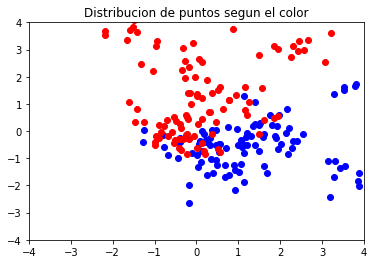

In [33]:
visualize_colors(ptos_observados_azul, ptos_observados_rojo)

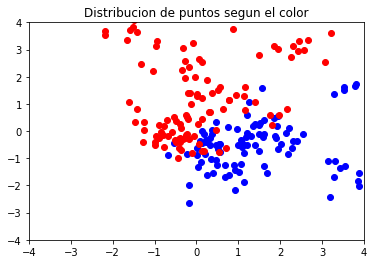

In [34]:
visualize_colors(puntosAzul_t,puntosRojo_t)